In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#read the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_onehot = pd.get_dummies(insurance)  

In [4]:
#make x and y
X = insurance_onehot.drop('charges',axis=1)
y = insurance_onehot['charges']
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [5]:
y.head()


0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [6]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [7]:
#build the model
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])
insurance_model.fit(X_train,y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 3s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3945 - mae: 7595.3945
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7773 - mae: 7496.7773
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1738 - mae: 7493.1738

In [8]:
#check result
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [9]:
#build the model
tf.random.set_seed(42)
insurance_model_2 = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])
insurance_model_2.fit(X_train,y_train,epochs=100,verbose=2)

Epoch 1/100
34/34 - 0s - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 - 0s - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 - 0s - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 - 0s - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 - 0s - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 - 0s - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 - 0s - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 - 0s - loss: 7528.8398 - mae: 7528.8398
Epoch 9/100
34/34 - 0s - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 - 0s - loss: 7409.0811 - mae: 7409.0811
Epoch 11/100
34/34 - 0s - loss: 7390.8042 - mae: 7390.8042
Epoch 12/100
34/34 - 0s - loss: 7368.9170 - mae: 7368.9170
Epoch 13/100
34/34 - 0s - loss: 7348.5195 - mae: 7348.5195
Epoch 14/100
34/34 - 0s - loss: 7326.4893 - mae: 7326.4893
Epoch 15/100
34/34 - 0s - loss: 7307.5811 - mae: 7307.5811
Epoch 16/100
34/34 - 0s - loss: 7285.7739 - mae: 7285.7739
Epoch 17/100
34/34 - 0s - loss: 7265.7104 - mae: 7265.7

In [10]:
#check result
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [11]:
#build the model
tf.random.set_seed(42)
insurance_model_3 = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])
history = insurance_model_3.fit(X_train,y_train,epochs=200,verbose=2)

Epoch 1/200
34/34 - 0s - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 - 0s - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 - 0s - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 - 0s - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 - 0s - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 - 0s - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 - 0s - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 - 0s - loss: 7528.8398 - mae: 7528.8398
Epoch 9/200
34/34 - 0s - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 - 0s - loss: 7409.0811 - mae: 7409.0811
Epoch 11/200
34/34 - 0s - loss: 7390.8042 - mae: 7390.8042
Epoch 12/200
34/34 - 0s - loss: 7368.9170 - mae: 7368.9170
Epoch 13/200
34/34 - 0s - loss: 7348.5195 - mae: 7348.5195
Epoch 14/200
34/34 - 0s - loss: 7326.4893 - mae: 7326.4893
Epoch 15/200
34/34 - 0s - loss: 7307.5811 - mae: 7307.5811
Epoch 16/200
34/34 - 0s - loss: 7285.7739 - mae: 7285.7739
Epoch 17/200
34/34 - 0s - loss: 7265.7104 - mae: 7265.7

In [12]:
#check result
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.5322 - mae: 3494.5322


[3494.5322265625, 3494.5322265625]

Text(0.5, 0, 'epochs')

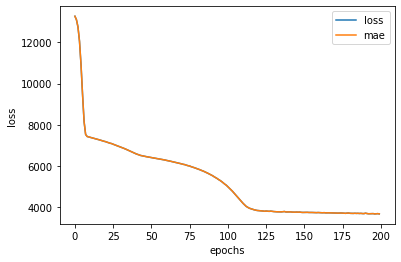

In [13]:
#plot history
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### how long should you train for 
it depends on the problem 
* tf has a solution it's called the [earlystopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), = is tf component you can add to your model to stop training once it stops improving a cenrtain metric.


# Preprocessing data (normalization and standardization)

* in terms of scaling values neural networks tend to prefer normalization
* if you are not sure try both and see results.


In [14]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


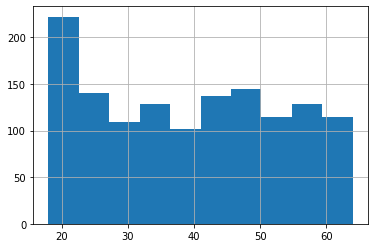

In [15]:
X['age'].hist()

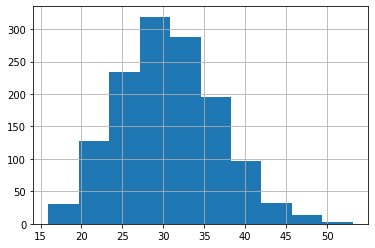

In [16]:
X['bmi'].hist()

In [17]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')


In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split

#create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age','bmi','children']),
    (OneHotEncoder(handle_unknown='ignore'),['sex','smoker','region'])
)

#create x and y
X = insurance.drop(['charges'],axis=1)
y = insurance['charges']

#build our train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [23]:
#what does our data look like
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [24]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [29]:
#build the model
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(200),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['mae'])
model.fit(X_train_normal, y_train, epochs= 100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13342.2354 - mae: 13342.2354
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13327.2090 - mae: 13327.2090
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13285.4648 - mae: 13285.4648
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13195.2617 - mae: 13195.2617
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13035.1377 - mae: 13035.1377
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12784.0195 - mae: 12784.0195
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12421.7021 - mae: 12421.7021
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 11933.0508 - mae: 11933.0508
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 11329.8174 - mae: 11329.8174
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 10690.51

In [30]:
#evalute 
model.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3353.4712 - mae: 3353.4712


[3353.47119140625, 3353.47119140625]